In [96]:
!pip install youtube-comment-downloader
!pip install schedule



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [98]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import numpy as np
import schedule
import time

<h3>Collecting Youtube Comments and storing author,comment,time in youtube_comments.csv</h3>

In [99]:
def load_to_file():
    df = pd.read_csv("youtube_comments.csv")
    print(df.head())

In [100]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def analyze_sentiment(text):
    tokens = preprocess_text(text)
    sentiment = sia.polarity_scores(' '.join(tokens))
    
   
    return sentiment

def sentiment_cal():
# Create a SentimentIntensityAnalyzer object
    sia = SentimentIntensityAnalyzer()
# Apply the sentiment analysis function to each review
    df['sentiment'] = df['Comment'].apply(analyze_sentiment)
    print(df)

In [101]:
# Extract compound scores from the sentiment dictionaries
def compound_cal():
    df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
    print(df['compound'])
# Create separate DataFrames for positive, negative, and neutral reviews
def print_song_behaviour():
    positive_comments = df[df['compound'] > 0.5]
    negative_comments = df[df['compound'] < -0.5]
    neutral_comments = df[(df['compound'] >= -0.5) & (df['compound'] <= 0.5)]
    perc_neg_comments=len(negative_comments )/len(df)
    perc_neg_comments
    if perc_neg_comments< 0.3:
        print("Good Song")
    elif perc_neg_comments> 0.6:
        print("Bad Song")
    else:
        print("Song is not Good/Bad")
def comment_segmentation():

    # Calculate the number of reviews in each category
    positive_count = len(positive_comments)
    negative_count = len(negative_comments)
    neutral_count = len(neutral_comments)

    # Create a list of labels and corresponding counts
    labels = ['Positive Comments', 'Negative Comments', 'Neutral Comments']
    sizes = [positive_count, negative_count, neutral_count]

    # Create the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [102]:
# Step 1: Convert the 'Time' column to hours ago
def convert_to_hours_ago(time_str):
    if "hour" in time_str:
        return int(time_str.split(" ")[0])
    elif "day" in time_str:
        return int(time_str.split(" ")[0]) * 24
    elif "minute" in time_str:
        return 0  # assuming minutes ago is recent, so we use 0 hours
    return np.nan
def cal_hours_ago():
    df['hours_ago'] = df['Time'].apply(convert_to_hours_ago)
    print(df.head())


In [103]:
def cal_overall_sentiment_score():
    print(df['compound'].mean())

In [104]:
def plot_sentiment_score():
# Group by 'hours_ago' and calculate the mean compound score
    grouped_df = df.groupby('hours_ago')['compound'].mean().reset_index()

# Print the grouped DataFrame
    print(grouped_df)
    plt.plot(grouped_df['hours_ago'], grouped_df['compound'])
    plt.xlabel('Hours Ago')
    plt.ylabel('Mean Compound Score')
    plt.title('Mean Sentiment Over Time')
    plt.grid(True)
    plt.show()

Comments saved to youtube_comments.csv
                       Author  \
0  @karinsuilamascarenhas1507   
1                @AVDTIENDA40   
2                   @0Johnny7   
3          @StormforceChannel   
4                  @sylvia5py   

                                             Comment            Time  
0                                  Caramba que top😮❤  55 seconds ago  
1                              Brutal \n10/10\n🤯🤯🤯🤯🤯  58 seconds ago  
2                             Pega poooorrrrraaa!!!!    1 minute ago  
3  This song is awesome! So nice to see and hear ...    1 minute ago  
4                                            Love it    1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656 

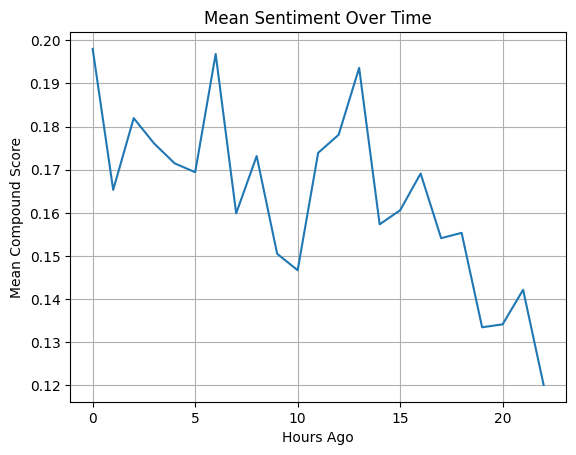

Comments saved to youtube_comments.csv
               Author                                            Comment  \
0            @jpv6800    Linkin Park meet Paramore and I love the result   
1         @Oliver_onm  Vai ser Sucesso atrás do outro como Sempre 👏🏼s...   
2  @davihenriques9908                                               Wow.   
3     @ХЛАМнезаходите                                          very cool   
4   @carloemiliod9997           😢 no encuentro el tic de la buena música   

             Time  
0  23 seconds ago  
1  59 seconds ago  
2    1 minute ago  
3    1 minute ago  
4    1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
23657        @Mustafa

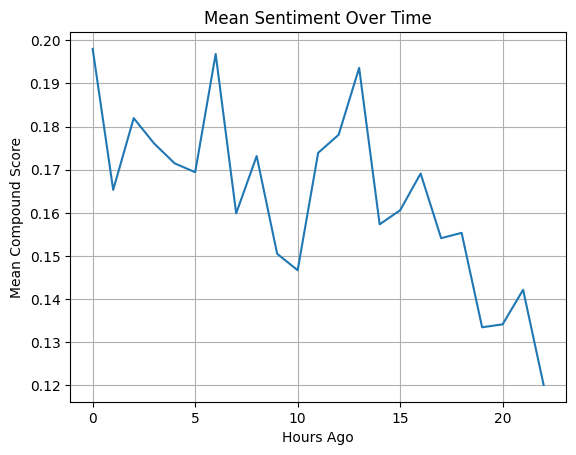

Comments saved to youtube_comments.csv
                Author                                            Comment  \
0        @Daniel-es7tq              Uma mistura de deftones messa música.   
1  @nahueldelaunay3729                                     zzzzzzzzzzzzzz   
2        @CARBALLALRAP                                               Top!   
3  @kritsadajamlek2241  Welcome back to my hearth.\nThank you Linkin P...   
4            @kero5643                                    I miss old LP 😔   

             Time  
0  56 seconds ago  
1    1 minute ago  
2    1 minute ago  
3    1 minute ago  
4    1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
23657        @M

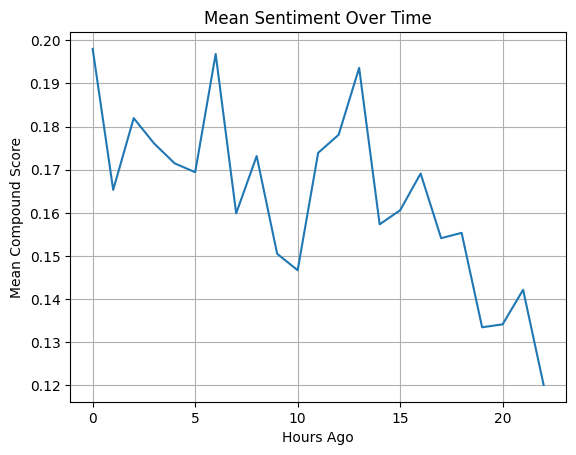

Comments saved to youtube_comments.csv
                 Author                                            Comment  \
0             @hugopasz                 En la peda de la cena de egreso...   
1           @8_mary_846                                 Omg back to 2000 !   
2             @muusti17  noo, this is not linkinpark, i dont like this ...   
3     @adisakjaidee6601                                     6 Steps Closer   
4  @grzegorzgwizdaa5031  Chester sent us Emily from heaven. Miss you an...   

            Time  
0   1 minute ago  
1   1 minute ago  
2   1 minute ago  
3  2 minutes ago  
4  2 minutes ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
23657        @M

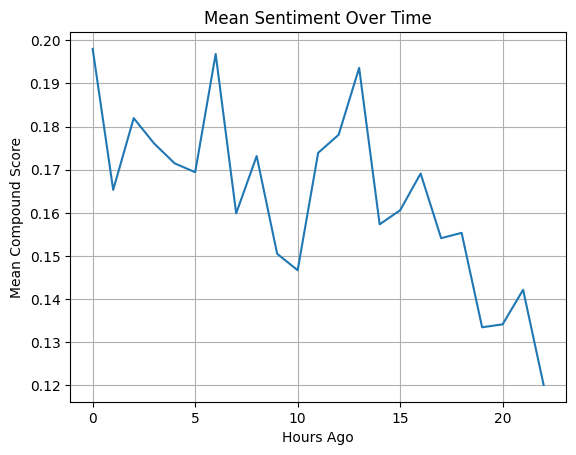

Comments saved to youtube_comments.csv
                  Author                                            Comment  \
0          @Marcosilva27         Eu arrepiei todo! LP de volta!!!!!! ❤❤❤❤❤❤   
1            @DeaDL0cK85  Figure.09 with a sosia of Guano Apes for singe...   
2  @JorgeFernandez-fk3hx           Que voz tiene emily madre de diosss 🤟😈😲😲   
3         @BESTGAMER97HY                                          이래야 린킨팍이지   
4              @murasd07                      Best song on the Album by far   

             Time  
0  28 seconds ago  
1  36 seconds ago  
2  40 seconds ago  
3  51 seconds ago  
4    1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
236

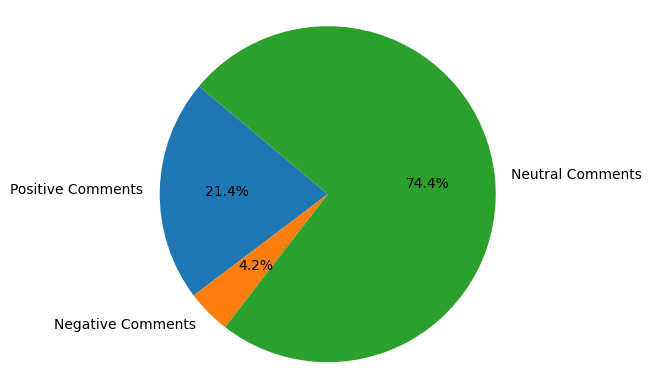

                   Author                                            Comment  \
0               @SWAGLIFT                                 What a BANGER! 💯💣💥   
1           @undertow4629  Ok linkin...I see you haha. But I'll only exep...   
2                @torjlou  "STOP YELLING AT ME" I feel like I'm a teenage...   
3  @matthewdesjardins6081  Just not hitting on the same level, I respect ...   
4                 @avada0  So they dusted off the old guitar effects and ...   

           Time                                          sentiment  hours_ago  \
0  1 minute ago  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0   
1  1 minute ago  {'neg': 0.093, 'neu': 0.567, 'pos': 0.339, 'co...          0   
2  1 minute ago  {'neg': 0.458, 'neu': 0.333, 'pos': 0.208, 'co...          0   
3  1 minute ago  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp...          0   
4  1 minute ago  {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...          0   

   compound  
0    0.0000  
1   

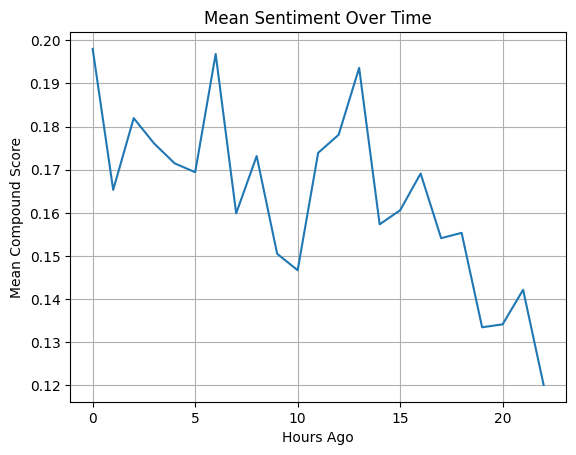

Comments saved to youtube_comments.csv
               Author                                            Comment  \
0             @edufur  This is it! This is the perfect new song. More...   
1  @carneiro.fernando                                           Paramore   
2    @brayanreyes3143       AQUÍ EL COMENTARIO EN ESPAÑOL QUE BUSCABAS ✨   
3              @jonfc  isso é linkin park porra!🔥 e os haters?? buá b...   
4          @spnkarina  Música maravilhosa! Minha banda favorita nunca...   

                    Time  
0         19 seconds ago  
1         28 seconds ago  
2         40 seconds ago  
3  1 minute ago (edited)  
4           1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656       

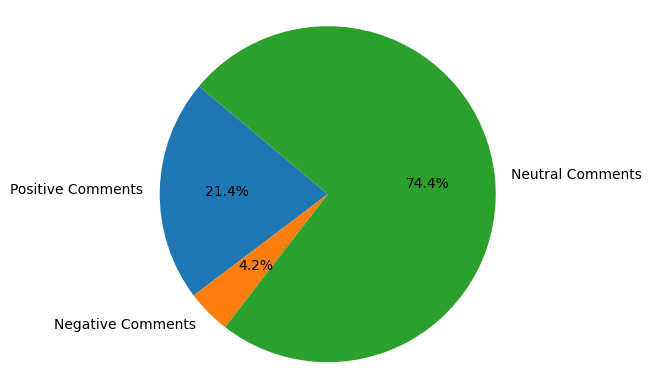

                   Author                                            Comment  \
0               @SWAGLIFT                                 What a BANGER! 💯💣💥   
1           @undertow4629  Ok linkin...I see you haha. But I'll only exep...   
2                @torjlou  "STOP YELLING AT ME" I feel like I'm a teenage...   
3  @matthewdesjardins6081  Just not hitting on the same level, I respect ...   
4                 @avada0  So they dusted off the old guitar effects and ...   

           Time                                          sentiment  hours_ago  \
0  1 minute ago  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0   
1  1 minute ago  {'neg': 0.093, 'neu': 0.567, 'pos': 0.339, 'co...          0   
2  1 minute ago  {'neg': 0.458, 'neu': 0.333, 'pos': 0.208, 'co...          0   
3  1 minute ago  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp...          0   
4  1 minute ago  {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...          0   

   compound  
0    0.0000  
1   

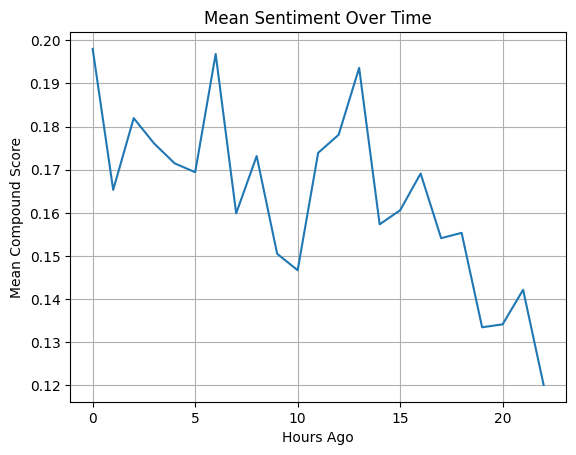

Comments saved to youtube_comments.csv
               Author                                            Comment  \
0     @Jarbas.Travels                           So so so soooo good !!!!   
1            @pres002  Sound slike she's forcing her voice too much. ...   
2   @hugolpsales.DF76  A voz dela ainda não encaixou.\nNa banda a pon...   
3          @kine_alex                           Better than last album 👀   
4  @chug-chug-pickles  Emily bringing out her inner EmJ is just the b...   

                    Time  
0         20 seconds ago  
1         35 seconds ago  
2           1 minute ago  
3           1 minute ago  
4  1 minute ago (edited)  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656       

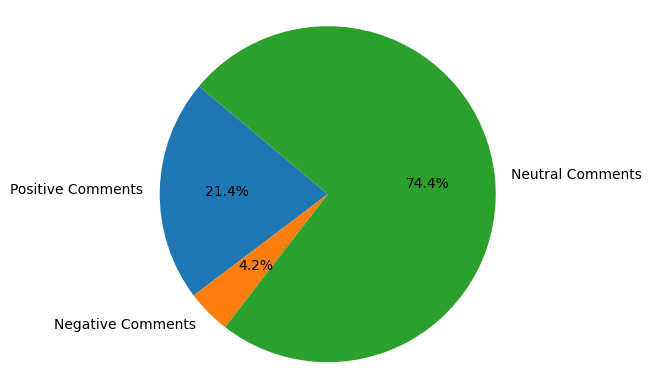

                   Author                                            Comment  \
0               @SWAGLIFT                                 What a BANGER! 💯💣💥   
1           @undertow4629  Ok linkin...I see you haha. But I'll only exep...   
2                @torjlou  "STOP YELLING AT ME" I feel like I'm a teenage...   
3  @matthewdesjardins6081  Just not hitting on the same level, I respect ...   
4                 @avada0  So they dusted off the old guitar effects and ...   

           Time                                          sentiment  hours_ago  \
0  1 minute ago  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0   
1  1 minute ago  {'neg': 0.093, 'neu': 0.567, 'pos': 0.339, 'co...          0   
2  1 minute ago  {'neg': 0.458, 'neu': 0.333, 'pos': 0.208, 'co...          0   
3  1 minute ago  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp...          0   
4  1 minute ago  {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...          0   

   compound  
0    0.0000  
1   

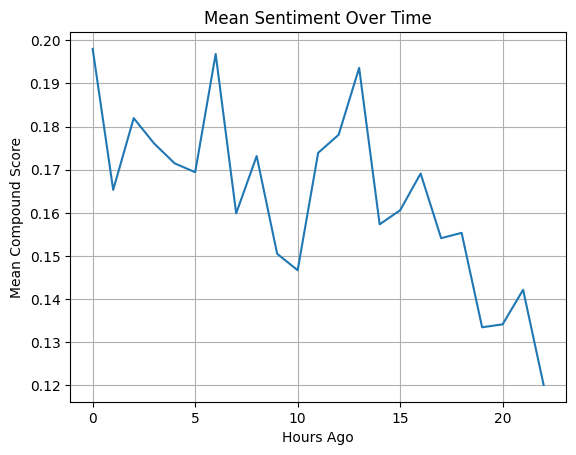

Comments saved to youtube_comments.csv
                 Author                                            Comment  \
0   @zambrinirevolution                                Delicious Girl❤ 🥰🥰🥰   
1      @felipecelso1994  e o Nu Metal volta a respirar novamente, que m...   
2             @mugi5782                     emily just rocked in the video   
3          @MayraOrosco                    ¿EN que momento canta la chica?   
4  @richardvanvliet6956  🤘😈🤘Emily Armstrong throwin some serious Jason ...   

             Time  
0  56 seconds ago  
1    1 minute ago  
2   2 minutes ago  
3   2 minutes ago  
4   2 minutes ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
23657    

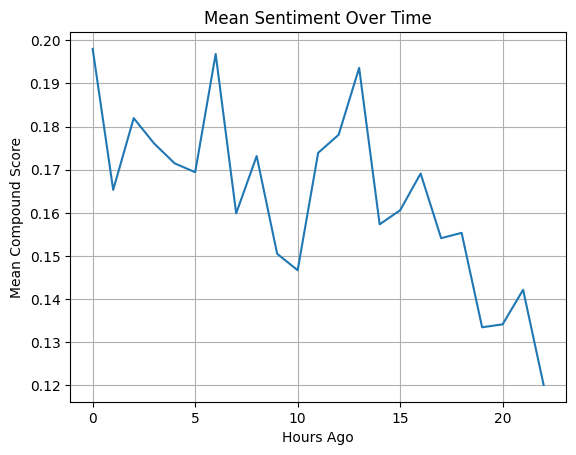

Comments saved to youtube_comments.csv
              Author                                            Comment  \
0          @KeshOwlk  It sounded a lot like Caught in the Middle by ...   
1   @tiagoaquino8766       Mate, this clip give me SOAD Chop Suey vibes   
2         @ivoknight                          ohhhhhhhhh I liked a lot!   
3         @FluffBite                                            Perfect   
4  @andreparagas5443  Intro - gives me qwerty/given up vibe \n\n1:58...   

             Time  
0  11 seconds ago  
1  22 seconds ago  
2  32 seconds ago  
3  56 seconds ago  
4    1 minute ago  
                       Author  \
0                   @SWAGLIFT   
1               @undertow4629   
2                    @torjlou   
3      @matthewdesjardins6081   
4                     @avada0   
...                       ...   
23653           @sunsigil5404   
23654           @DividedQueen   
23655            @NoahSanchez   
23656            @NoahSanchez   
23657        @MustafaEfekan

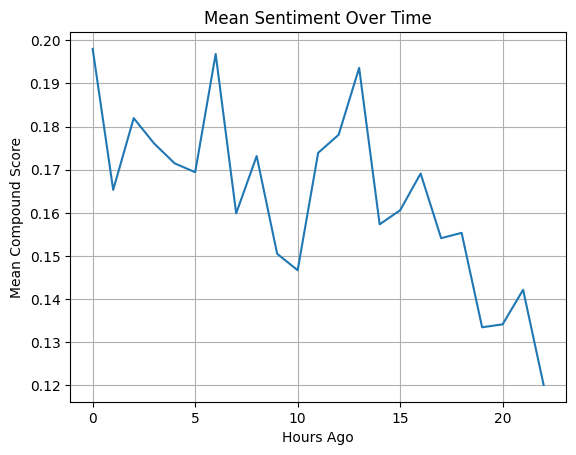

In [ ]:
def fetch_youtube_comments():
# Initialize the downloader
    downloader = YoutubeCommentDownloader()

# YouTube video URL or video ID
    video_id = "kivUsDGWojU"  # or use the full URL: 'https://www.youtube.com/watch?v=LFWrc10Kb1w'

# Open a CSV file to save comments
    with open("youtube_comments.csv", mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Author", "Comment", "Time"])  # Header with time included

    # Fetch and write comments
        for comment in downloader.get_comments(video_id):
            writer.writerow([comment["author"], comment["text"], comment["time"]])  # Write author, text, and time
        #print(f"{comment['author']} at {comment['time']}: {comment['text']}")  # Display comment with time in console

    print("Comments saved to youtube_comments.csv")
    load_to_file()
    sentiment_cal()
    compound_cal()
    print_song_behaviour()
    comment_segmentation()
    cal_hours_ago()
    cal_overall_sentiment_score()
    plot_sentiment_score()
schedule.every(15).minutes.do(fetch_youtube_comments)
while True:
    schedule.run_pending()
    time.sleep(20)  # Wait for 1 minute before checking again